### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 11

# PreLab

## Importing Libraries

In [143]:
# %pip install --upgrade mlxtend 
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [144]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from matplotlib import pyplot as plt
import seaborn as sns
import networkx as nx

## Intro to Association Rule Mining

In [145]:
# Sample dataset
data = {
    "Bread": [1, 1, 0, 1],
    "Milk": [1, 1, 1, 0],
    "Butter": [0, 1, 1, 1],
    "Eggs": [1, 0, 1, 1],
}
df = pd.DataFrame(data)
# Step 1: Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
# Calculate the number of transactions 
num_itemsets = len(df)  # Total rows in the dataset 
print("Frequent Itemsets:") 
print(frequent_itemsets) 
# Step 2: Generate association rules 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets) 
print("\nAssociation Rules:") 
print(rules) 

Frequent Itemsets:
   support         itemsets
0     0.75          (Bread)
1     0.75           (Milk)
2     0.75         (Butter)
3     0.75           (Eggs)
4     0.50    (Milk, Bread)
5     0.50  (Butter, Bread)
6     0.50    (Eggs, Bread)
7     0.50   (Milk, Butter)
8     0.50     (Milk, Eggs)
9     0.50   (Butter, Eggs)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0       (Milk)     (Bread)                0.75                0.75      0.5   
1      (Bread)      (Milk)                0.75                0.75      0.5   
2     (Butter)     (Bread)                0.75                0.75      0.5   
3      (Bread)    (Butter)                0.75                0.75      0.5   
4       (Eggs)     (Bread)                0.75                0.75      0.5   
5      (Bread)      (Eggs)                0.75                0.75      0.5   
6       (Milk)    (Butter)                0.75                0.75      0.5   
7     (Butter)      (

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


1. **Can you combine Association Rule Mining with clustering (e.g., K-Means) to group similar rules?**  
   Yes, by representing rules as feature vectors (e.g., using support, confidence, and lift) and applying clustering, similar rules can be grouped to identify overarching patterns.

2. **What are the limitations of Association Rule Mining when applied to noisy or high-dimensional datasets?**  
   Noisy data can lead to spurious patterns or low-confidence rules, while high-dimensional datasets suffer from scalability issues and sparse itemsets, making interpretation challenging.

##  Implementation of Apriori Algorithm

In [146]:
# Sample dataset 
data = {'Bread': [1, 1, 0, 1], 
'Milk': [1, 1, 1, 0], 
'Butter': [0, 1, 1, 1], 
'Eggs': [1, 0, 1, 1]} 
df = pd.DataFrame(data) 
# Step 1: Generate frequent itemsets 
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True) 
print("Frequent Itemsets:") 
print(frequent_itemsets) 
# Step 2: Calculate the number of transactions 
num_itemsets = len(df)  # Total number of rows in the dataset 
# Step 3: Generate association rules 
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets, ) 
print("\nAssociation Rules:") 
print(rules) 

Frequent Itemsets:
   support         itemsets
0     0.75          (Bread)
1     0.75           (Milk)
2     0.75         (Butter)
3     0.75           (Eggs)
4     0.50    (Milk, Bread)
5     0.50  (Butter, Bread)
6     0.50    (Eggs, Bread)
7     0.50   (Milk, Butter)
8     0.50     (Milk, Eggs)
9     0.50   (Butter, Eggs)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0       (Milk)     (Bread)                0.75                0.75      0.5   
1      (Bread)      (Milk)                0.75                0.75      0.5   
2     (Butter)     (Bread)                0.75                0.75      0.5   
3      (Bread)    (Butter)                0.75                0.75      0.5   
4       (Eggs)     (Bread)                0.75                0.75      0.5   
5      (Bread)      (Eggs)                0.75                0.75      0.5   
6       (Milk)    (Butter)                0.75                0.75      0.5   
7     (Butter)      (

c:\Users\Ahmed Mohiuddin Shah\Documents\Machine Learning\.conda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


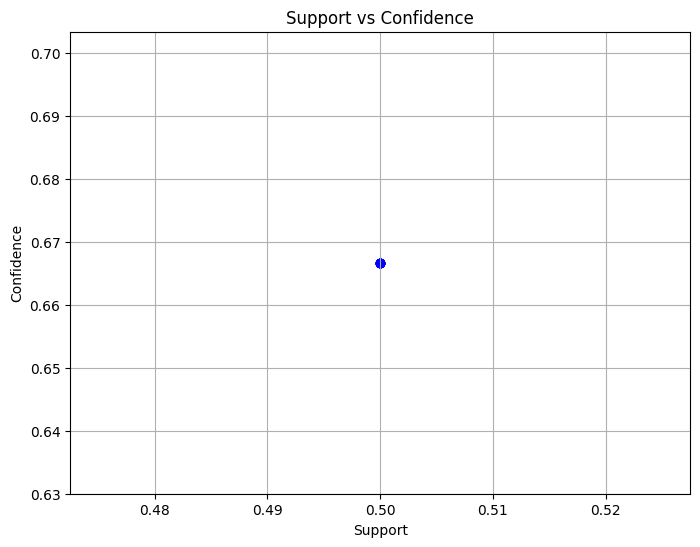

In [147]:
# Step 4: Plot support vs. confidence
plt.figure(figsize=(8, 6))
plt.scatter(rules["support"], rules["confidence"], alpha=0.7, c="blue")
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True)
plt.show()

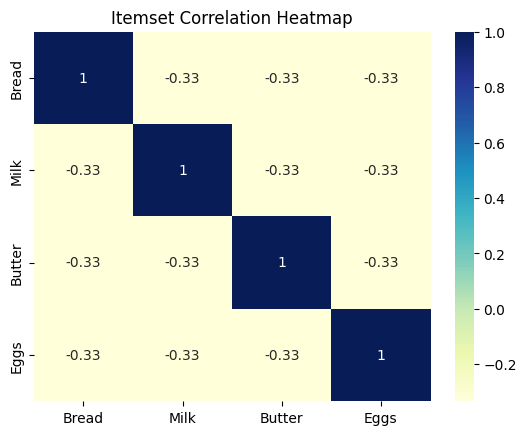

In [148]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Itemset Correlation Heatmap")
plt.show()

## Advanced Visualization of Rules 

### Scatter Plots: Support vs Confidence 

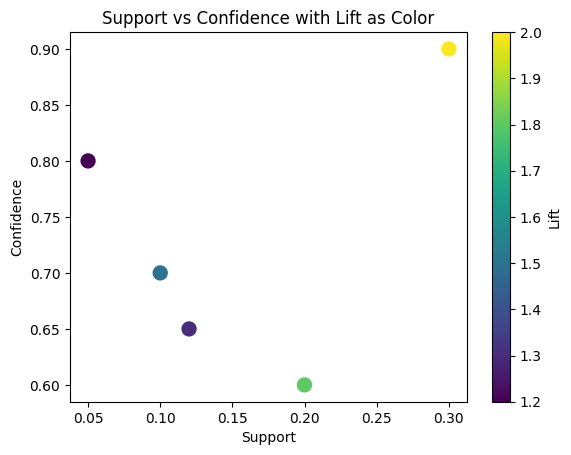

In [149]:
# Example data
support = [0.1, 0.2, 0.05, 0.3, 0.12]
confidence = [0.7, 0.6, 0.8, 0.9, 0.65]
lift = [1.5, 1.8, 1.2, 2.0, 1.3]
# Scatter plot
plt.scatter(support, confidence, c=lift, cmap="viridis", s=100)
plt.colorbar(label="Lift")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence with Lift as Color")
plt.show()

### Heatmaps: Lift Values of Different Item Combinations 

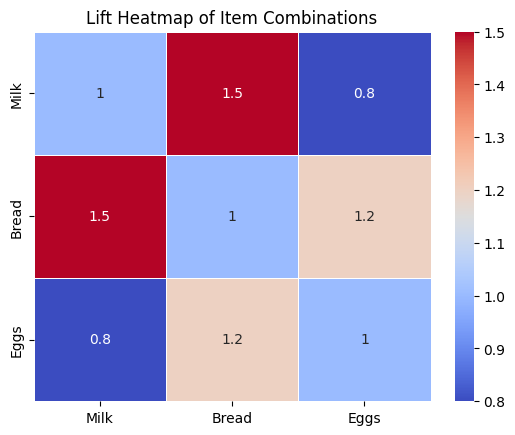

In [150]:
# Example data
data = {"Milk": [1, 1.5, 0.8], "Bread": [1.5, 1, 1.2], "Eggs": [0.8, 1.2, 1]}
lift_matrix = pd.DataFrame(data, index=["Milk", "Bread", "Eggs"])
# Heatmap
sns.heatmap(lift_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Lift Heatmap of Item Combinations")
plt.show()

### Network Graphs: Visualizing Item Relationships as Graphs 

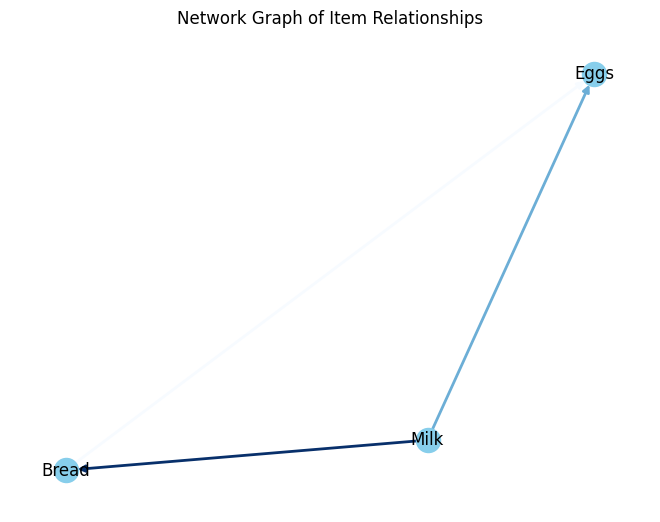

In [151]:
# Example data
G = nx.DiGraph()
G.add_edge("Milk", "Bread", weight=0.8)
G.add_edge("Bread", "Eggs", weight=0.6)
G.add_edge("Milk", "Eggs", weight=0.7)
# Draw graph
pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [edge[2]["weight"] for edge in edges]
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color="skyblue",
    edge_color=weights,
    width=2.0,
    edge_cmap=plt.cm.Blues,
)
plt.title("Network Graph of Item Relationships")
plt.show()

# Mini Challenge

## Importing Libraries

In [152]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx
import os

## Loading Dataset

In [153]:
# Download latest version
path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ahmed Mohiuddin Shah\.cache\kagglehub\datasets\heeraldedhia\groceries-dataset\versions\1


In [154]:
# print the files in the directory
print(os.listdir(path))

['Groceries_dataset.csv']


In [155]:
grocery_data = pd.read_csv(os.path.join(path, "Groceries_dataset.csv"))
grocery_data.head()

Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

## PreProcessing Dataset

### Checking For Missing Values

In [156]:
# Check for missing values
print(grocery_data.isnull().sum())
print(grocery_data.shape)

Member_number      0
Date               0
itemDescription    0
dtype: int64
(38765, 3)


### Checking Unique Rows

In [157]:
# Check for Unique values in each column
for col in grocery_data.columns:
    print(col, ":", grocery_data[col].nunique())

Member_number : 3898
Date : 728
itemDescription : 167


In [158]:
# Check the Member_number and Date columns
print(grocery_data["Member_number"].nunique())
print(grocery_data["Date"].nunique())

3898
728


### Converting into Suitable Format

In [159]:
# Group by Member_number and Date to aggregate item descriptions
transactions = grocery_data[[
    "Member_number", "itemDescription"
]].sort_values(by="Member_number", ascending=False)

transactions["itemDescription"] = transactions["itemDescription"].str.strip()

transactions

Member_number      itemDescription
34885           5000  semi-finished bread
25489           5000     other vegetables
3578            5000                 soda
27877           5000               onions
9340            5000         bottled beer
...              ...                  ...
24544           1000               yogurt
4843            1000              sausage
20992           1000  semi-finished bread
8395            1000           whole milk
13331           1000           whole milk

[38765 rows x 2 columns]

In [160]:
transactions = [
    a[1]["itemDescription"].tolist()
    for a in list(transactions.groupby(["Member_number"]))
]

In [161]:
# Convert transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

df_transactions.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False   True    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False                True   False         True   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False        True    True     False  
1       False        True   False     False  
2       False        True   False     False  
3       False       False   False     False  
4       False        True   False     False  

[5 rows x 167 columns]

## Using Apriori Algorithm

### Using Max Length Undefined

In [162]:
# Generate frequent itemsets
frequent_itemsets = apriori(
    df_transactions, min_support=0.01, use_colnames=True
)
# sort by support
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)
frequent_itemsets.head()

support            itemsets
113  0.458184        (whole milk)
69   0.376603  (other vegetables)
84   0.349666        (rolls/buns)
94   0.313494              (soda)
114  0.282966            (yogurt)

In [163]:
# Generate association rules
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.3, num_itemsets=len(df)
)
rules = rules[(rules["confidence"] >= 0.3) & (rules["lift"] >= 1.2)]

# Sort by lift
sorted_rules = rules.sort_values(by="lift", ascending=False)
sorted_rules.head()

antecedents                     consequents  \
1772  (other vegetables, sausage, rolls/buns)            (yogurt, whole milk)   
3331               (whole milk, frozen meals)  (other vegetables, rolls/buns)   
2972      (yogurt, bottled water, rolls/buns)  (other vegetables, whole milk)   
3394      (shopping bags, yogurt, rolls/buns)  (other vegetables, whole milk)   
3320                          (sausage, curd)            (yogurt, whole milk)   

      antecedent support  consequent support   support  confidence      lift  \
1772            0.041816            0.150590  0.013597    0.325153  2.159196   
3331            0.032581            0.146742  0.010005    0.307087  2.092699   
2972            0.026424            0.191380  0.010518    0.398058  2.079934   
3394            0.025141            0.191380  0.010005    0.397959  2.079417   
3320            0.032068            0.150590  0.010005    0.312000  2.071850   

      representativity  leverage  conviction  zhangs_metric   jaccard  \
1772               1.0  0.007300    1.258671       0.560294  0.076040   
3331               1.0  0.005224    1.231407       0.539733  0.059091   
2972               1.0  0.005461    1.343352       0.533308  0.050743   
3394               1.0  0.005194    1.343131       0.532483  0.048447   
3320               1.0  0.005176    1.234607       0.534479  0.057949   

      certainty  kulczynski  
1772   0.205511    0.207721  
3331   0.187921    0.187634  
2972   0.255594    0.226509  
3394   0.255471    0.225119  
3320   0.190026    0.189220

#### Scatter Plot

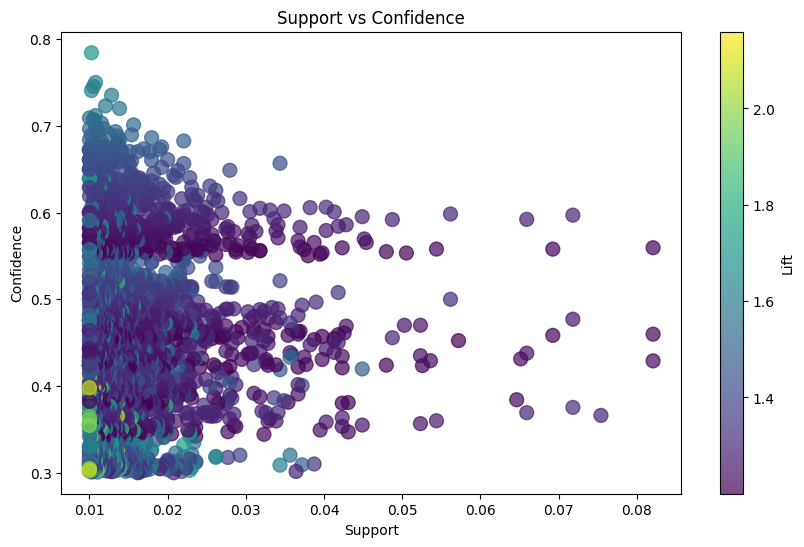

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(
    rules["support"],
    rules["confidence"],
    c=rules["lift"],
    cmap="viridis",
    s=100,
    alpha=0.7,
)
plt.colorbar(label="Lift")
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

#### Lift Matrix

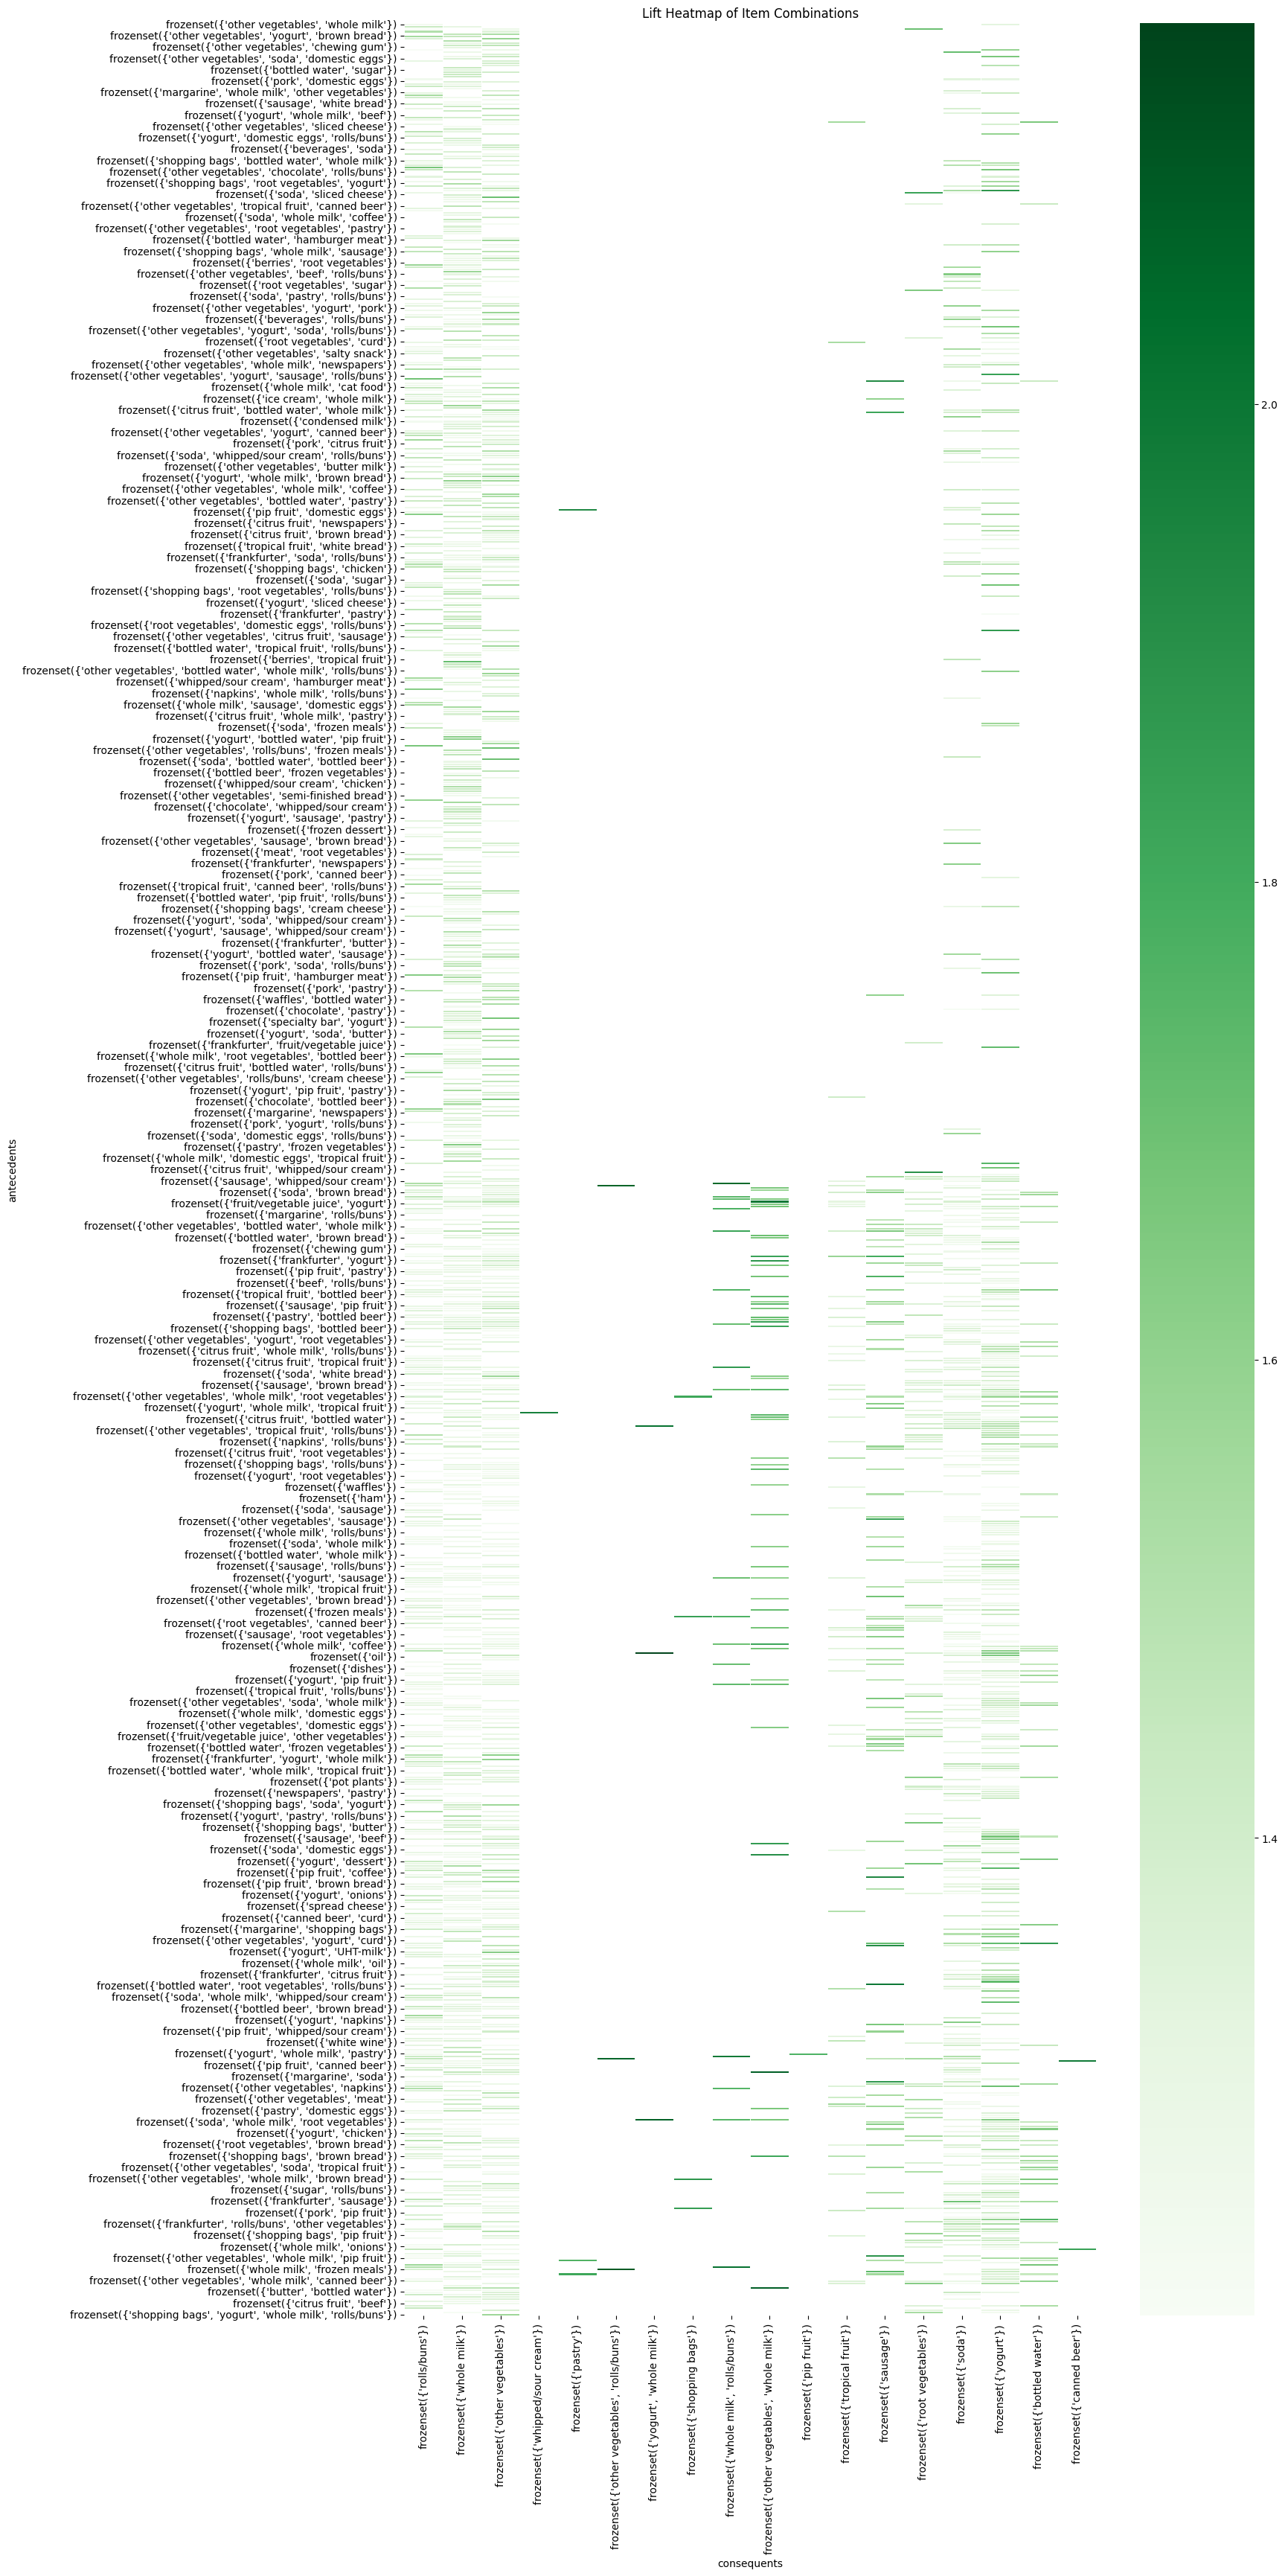

consequents                                      (rolls/buns)  (whole milk)  \
antecedents                                                                   
(other vegetables, whole milk)                       1.226753           NaN   
(other vegetables, soda, newspapers)                 1.429934      1.304195   
(soda, newspapers, whole milk)                       1.205631           NaN   
(whole milk, bottled beer, tropical fruit)           1.506812           NaN   
(tropical fruit, bottled beer, rolls/buns)                NaN      1.464986   
...                                                       ...           ...   
(other vegetables, soda, sausage)                    1.367763           NaN   
(other vegetables, onions)                           1.440849           NaN   
(onions, rolls/buns)                                      NaN           NaN   
(other vegetables, canned beer, rolls/buns)               NaN      1.208509   
(shopping bags, yogurt, whole milk, rolls/buns)           NaN           NaN   

consequents                                      (other vegetables)  \
antecedents                                                           
(other vegetables, whole milk)                                  NaN   
(other vegetables, soda, newspapers)                            NaN   
(soda, newspapers, whole milk)                             1.275592   
(whole milk, bottled beer, tropical fruit)                 1.341933   
(tropical fruit, bottled beer, rolls/buns)                 1.527715   
...                                                             ...   
(other vegetables, soda, sausage)                               NaN   
(other vegetables, onions)                                      NaN   
(onions, rolls/buns)                                       1.379927   
(other vegetables, canned beer, rolls/buns)                     NaN   
(shopping bags, yogurt, whole milk, rolls/buns)            1.569049   

consequents                                      (whipped/sour cream)  \
antecedents                                                             
(other vegetables, whole milk)                                    NaN   
(other vegetables, soda, newspapers)                              NaN   
(soda, newspapers, whole milk)                                    NaN   
(whole milk, bottled beer, tropical fruit)                        NaN   
(tropical fruit, bottled beer, rolls/buns)                        NaN   
...                                                               ...   
(other vegetables, soda, sausage)                                 NaN   
(other vegetables, onions)                                        NaN   
(onions, rolls/buns)                                              NaN   
(other vegetables, canned beer, rolls/buns)                       NaN   
(shopping bags, yogurt, whole milk, rolls/buns)                   NaN   

consequents                                      (pastry)  \
antecedents                                                 
(other vegetables, whole milk)                        NaN   
(other vegetables, soda, newspapers)                  NaN   
(soda, newspapers, whole milk)                        NaN   
(whole milk, bottled beer, tropical fruit)            NaN   
(tropical fruit, bottled beer, rolls/buns)            NaN   
...                                                   ...   
(other vegetables, soda, sausage)                     NaN   
(other vegetables, onions)                            NaN   
(onions, rolls/buns)                                  NaN   
(other vegetables, canned beer, rolls/buns)           NaN   
(shopping bags, yogurt, whole milk, rolls/buns)       NaN   

consequents                                      (other vegetables, rolls/buns)  \
antecedents                                                                       
(other vegetables, whole milk)                                              NaN   
(other vegetables, soda, newspapers)                   

In [165]:
# Matrix Visualization but with the lift as the color and no labels on the cells
heatmap_data = rules.pivot(index="antecedents", columns="consequents", values="lift")

plt.figure(figsize=(15, 40))
sns.heatmap(heatmap_data, annot=False, cmap="Greens", linewidths=0.5)
plt.title("Lift Heatmap of Item Combinations")
plt.show()

heatmap_data

#### Network Graph

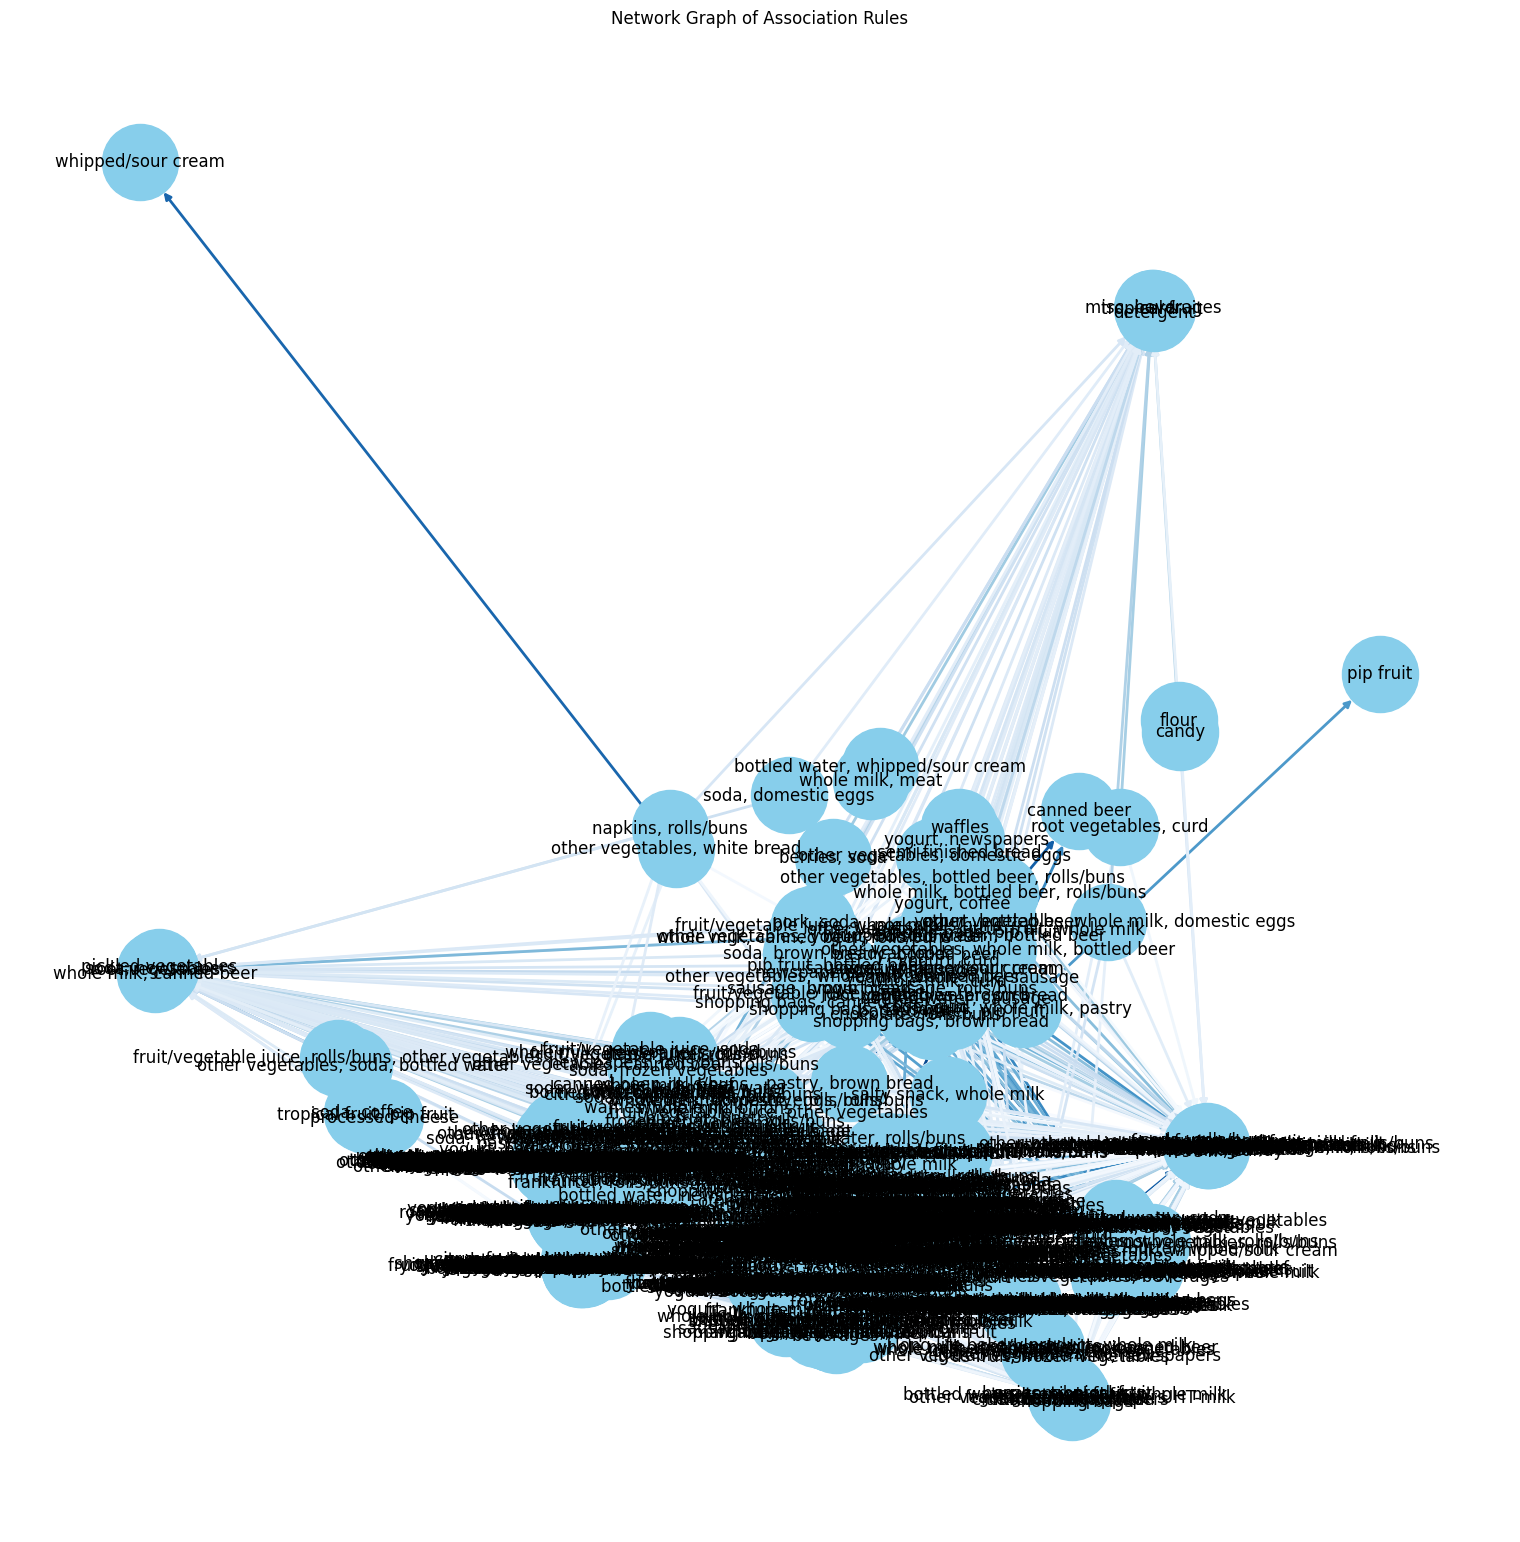

In [166]:
# Create a Network Graph
plt.figure(figsize=(15, 15))
G = nx.DiGraph()

for _, row in sorted_rules.iterrows():
    G.add_edge(
        ", ".join(row["antecedents"]), ", ".join(row["consequents"]), weight=row["lift"]
    )

pos = nx.spring_layout(G, k=0.0001, seed=42)
edges = G.edges(data=True)
weights = [edge[2]["weight"] for edge in edges]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    edge_color=weights,
    width=2.0,
    edge_cmap=plt.cm.Blues,
)
plt.title("Network Graph of Association Rules")
plt.show()

### Using Max Length 2

In [167]:
# Generate frequent itemsets
frequent_itemsets = apriori(
    df_transactions, min_support=0.01, use_colnames=True, max_len=2
)
# sort by support
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)
frequent_itemsets.head()

support            itemsets
113  0.458184        (whole milk)
69   0.376603  (other vegetables)
84   0.349666        (rolls/buns)
94   0.313494              (soda)
114  0.282966            (yogurt)

In [168]:
# Generate association rules
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.3, num_itemsets=len(df)
)
rules = rules[(rules["confidence"] >= 0.3) & (rules["lift"] >= 1.2)]

# Sort by lift
sorted_rules = rules.sort_values(by="lift", ascending=False)
sorted_rules.head()

antecedents         consequents  antecedent support  \
263             (sugar)           (sausage)            0.065931   
344             (flour)    (tropical fruit)            0.036429   
231          (cat food)  (other vegetables)            0.043869   
367  (processed cheese)     (bottled water)            0.038481   
273             (sugar)     (bottled water)            0.065931   

     consequent support   support  confidence      lift  representativity  \
263            0.206003  0.020523    0.311284  1.511065               1.0   
344            0.233710  0.012827    0.352113  1.506625               1.0   
231            0.376603  0.024115    0.549708  1.459646               1.0   
367            0.213699  0.011801    0.306667  1.435038               1.0   
273            0.213699  0.020010    0.303502  1.420229               1.0   

     leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
263  0.006941    1.152866       0.362088  0.081633   0.132596    0.205455  
344  0.004313    1.182753       0.348978  0.049850   0.154515    0.203499  
231  0.007594    1.384426       0.329351  0.060841   0.277679    0.306870  
367  0.003578    1.134088       0.315287  0.049093   0.118234    0.180944  
273  0.005921    1.128934       0.316773  0.077075   0.114209    0.198570

#### Scatter Plot

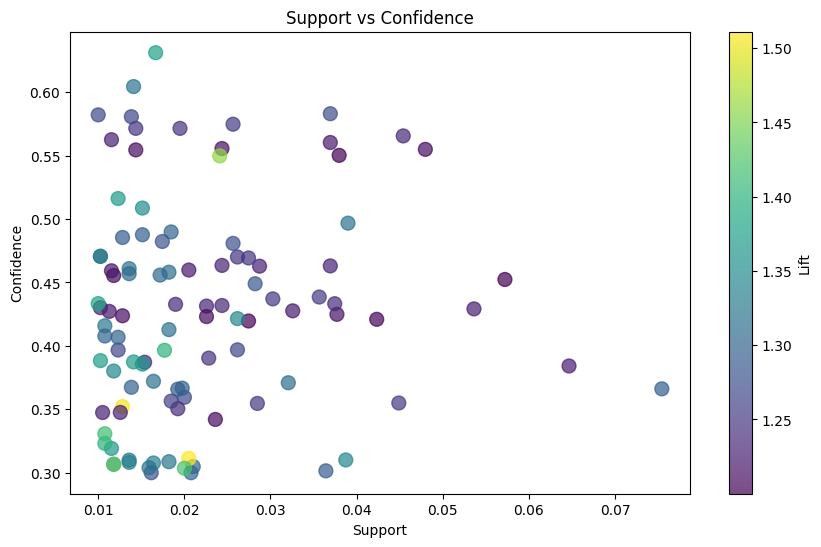

In [169]:
plt.figure(figsize=(10, 6))
plt.scatter(
    rules["support"],
    rules["confidence"],
    c=rules["lift"],
    cmap="viridis",
    s=100,
    alpha=0.7,
)
plt.colorbar(label="Lift")
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

#### Lift Matrix

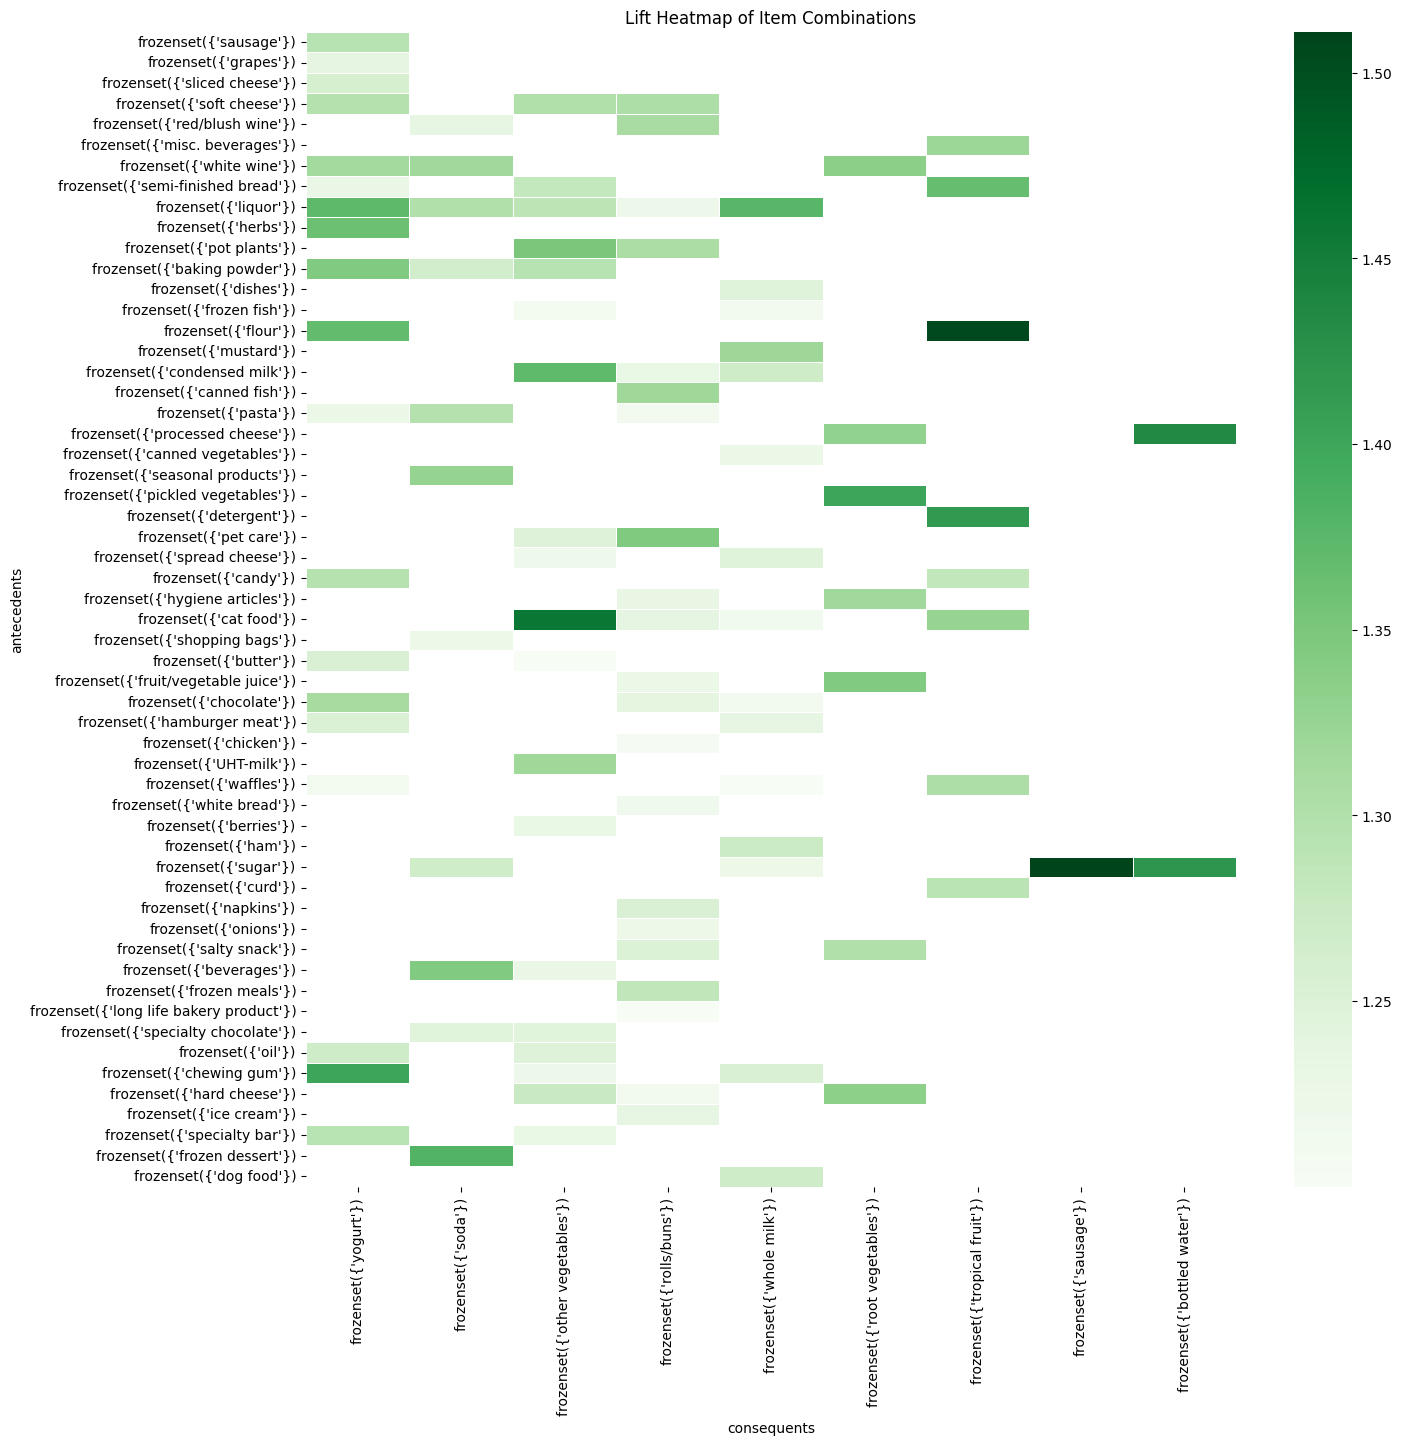

consequents                 (yogurt)    (soda)  (other vegetables)  \
antecedents                                                          
(sausage)                   1.293892       NaN                 NaN   
(grapes)                    1.238551       NaN                 NaN   
(sliced cheese)             1.259643       NaN                 NaN   
(soft cheese)               1.298203       NaN            1.300562   
(red/blush wine)                 NaN  1.234782                 NaN   
(misc. beverages)                NaN       NaN                 NaN   
(white wine)                1.314976  1.316742                 NaN   
(semi-finished bread)       1.228127       NaN            1.280577   
(liquor)                    1.372426  1.300717            1.288987   
(herbs)                     1.362784       NaN                 NaN   
(pot plants)                     NaN       NaN            1.350547   
(baking powder)             1.343503  1.265396            1.294740   
(dishes)                         NaN       NaN                 NaN   
(frozen fish)                    NaN       NaN            1.209351   
(flour)                     1.368802       NaN                 NaN   
(mustard)                        NaN       NaN                 NaN   
(condensed milk)                 NaN       NaN            1.370484   
(canned fish)                    NaN       NaN                 NaN   
(pasta)                     1.227915  1.297567                 NaN   
(processed cheese)               NaN       NaN                 NaN   
(canned vegetables)              NaN       NaN                 NaN   
(seasonal products)              NaN  1.326473                 NaN   
(pickled vegetables)             NaN       NaN                 NaN   
(detergent)                      NaN       NaN                 NaN   
(pet care)                       NaN       NaN            1.249559   
(spread cheese)                  NaN       NaN            1.219277   
(candy)                     1.295799       NaN                 NaN   
(hygiene articles)               NaN       NaN                 NaN   
(cat food)                       NaN       NaN            1.459646   
(shopping bags)                  NaN  1.225370                 NaN   
(butter)                    1.254462       NaN            1.201085   
(fruit/vegetable juice)          NaN       NaN                 NaN   
(chocolate)                 1.310830       NaN                 NaN   
(hamburger meat)            1.253271       NaN                 NaN   
(chicken)                        NaN       NaN                 NaN   
(UHT-milk)                       NaN       NaN            1.318979   
(waffles)                   1.208654       NaN                 NaN   
(white bread)                    NaN       NaN                 NaN   
(berries)                        NaN       NaN            1.229470   
(ham)                            NaN       NaN                 NaN   
(sugar)                          NaN  1.266012                 NaN   
(curd)                           NaN       NaN                 NaN   
(napkins)                        NaN       NaN                 NaN   
(onions)                         NaN       NaN                 NaN   
(salty snack)                    NaN       NaN                 NaN   
(beverages)                      NaN  1.344483            1.228905   
(frozen meals)                   NaN       NaN                 NaN   
(long life bakery product)       NaN       NaN                 NaN   
(specialty chocolate)            NaN  1.245162            1.246134   
(oil)                       1.270285       NaN            1.248120   
(chewing gum)               1.401413       NaN            1.220834   
(hard cheese)                    NaN       NaN            1.276593   
(ice cream)                      NaN       NaN                 NaN   
(specialty bar)             1.292926       NaN            1.230511   
(frozen dessert)                 NaN  1.382270                 NaN   
(dog food)

In [170]:
# Matrix Visualization but with the lift as the color and no labels on the cells
heatmap_data = rules.pivot(index="antecedents", columns="consequents", values="lift")

plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data, annot=False, cmap="Greens", linewidths=0.5)
plt.title("Lift Heatmap of Item Combinations")
plt.show()

heatmap_data

#### Network Graph

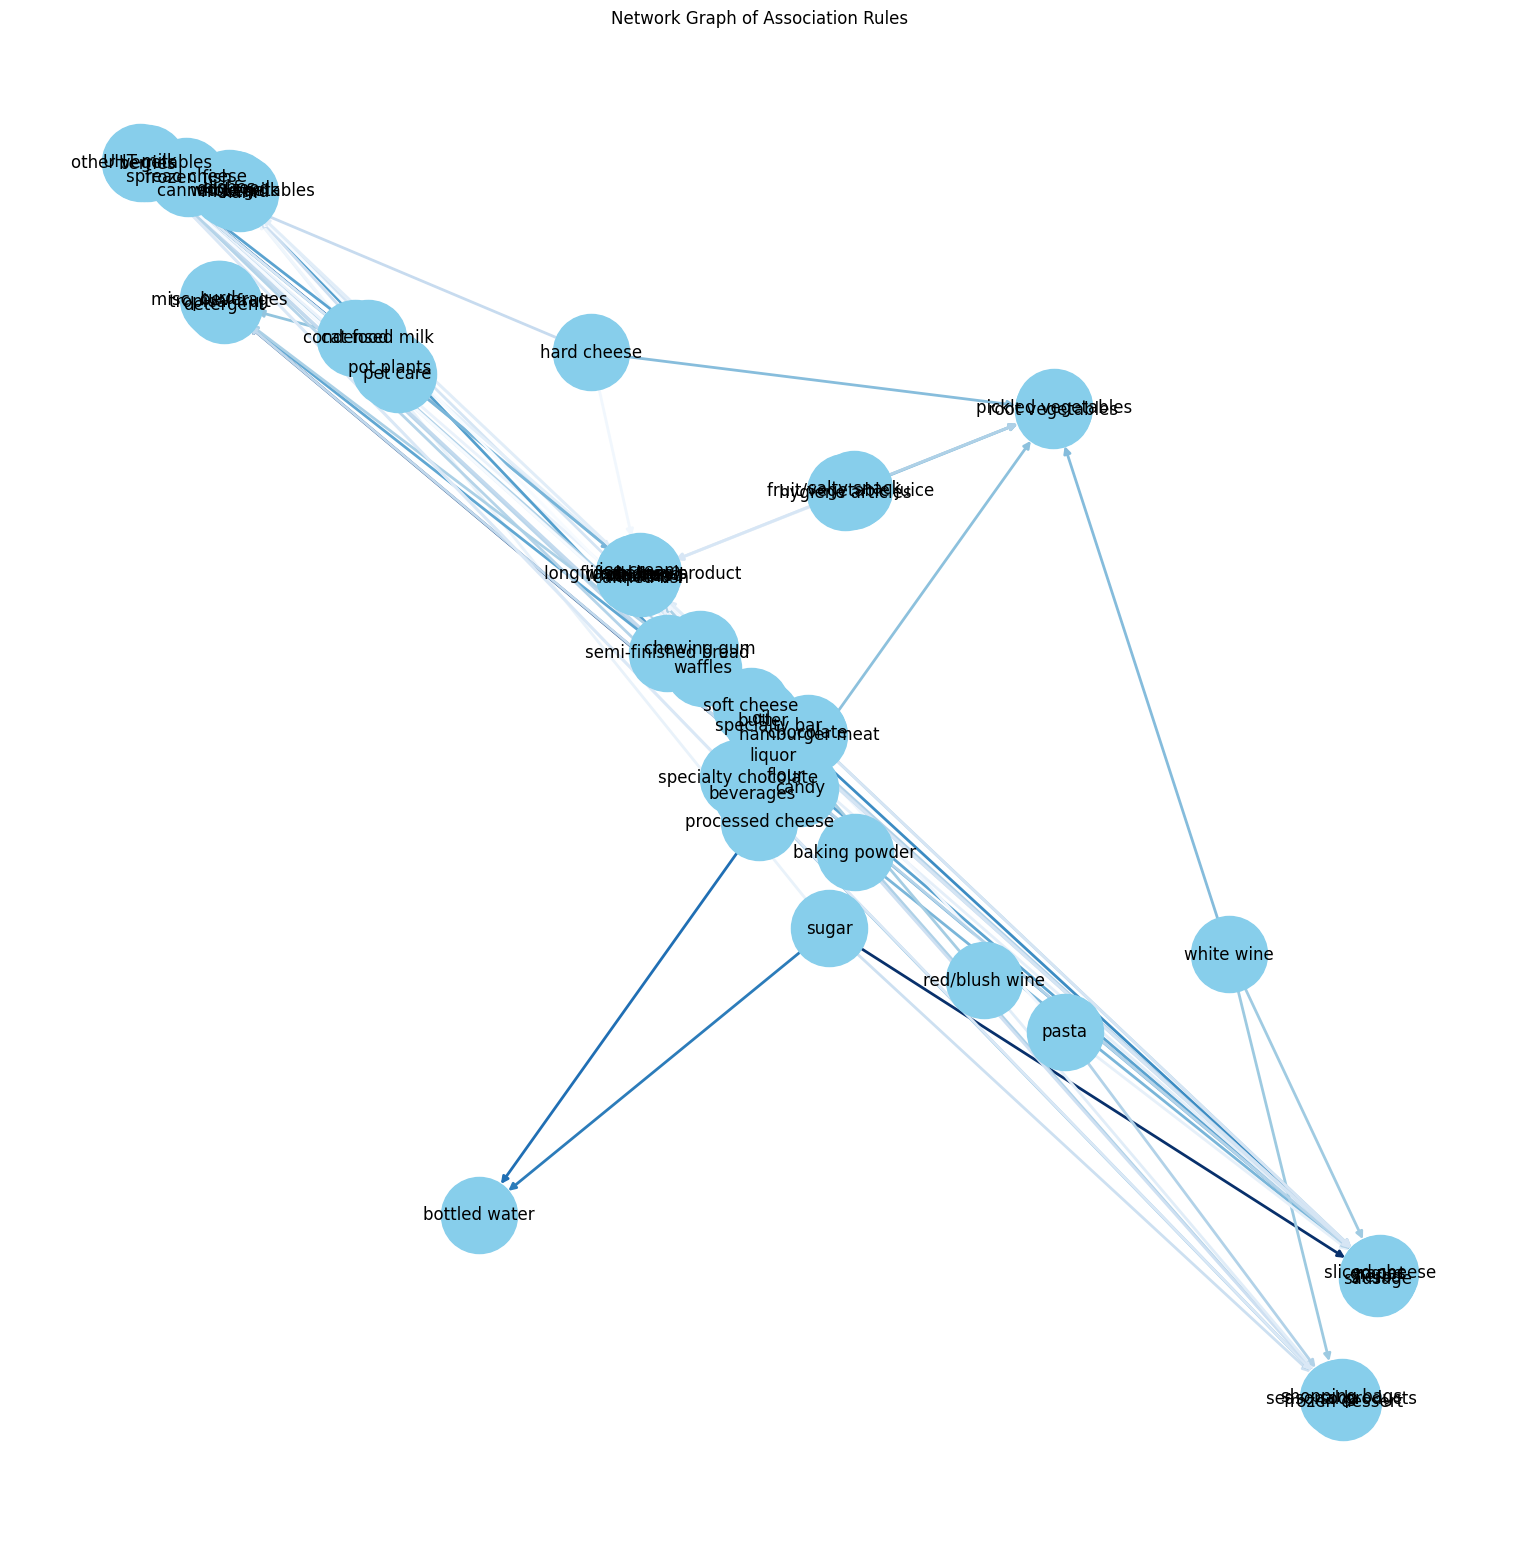

In [171]:
# Create a Network Graph
plt.figure(figsize=(15, 15))
G = nx.DiGraph()

for _, row in sorted_rules.iterrows():
    G.add_edge(
        ", ".join(row["antecedents"]), ", ".join(row["consequents"]), weight=row["lift"]
    )

pos = nx.spring_layout(G, k=0.0001, seed=42)
edges = G.edges(data=True)
weights = [edge[2]["weight"] for edge in edges]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    edge_color=weights,
    width=2.0,
    edge_cmap=plt.cm.Blues,
)
plt.title("Network Graph of Association Rules")
plt.show()

### Using Max Length 3

In [172]:
# Generate frequent itemsets
frequent_itemsets = apriori(
    df_transactions, min_support=0.01, use_colnames=True, max_len=3
)
# sort by support
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)
frequent_itemsets.head()

support            itemsets
113  0.458184        (whole milk)
69   0.376603  (other vegetables)
84   0.349666        (rolls/buns)
94   0.313494              (soda)
114  0.282966            (yogurt)

In [173]:
# Generate association rules
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.3, num_itemsets=len(df)
)
rules = rules[(rules["confidence"] >= 0.3) & (rules["lift"] >= 1.2)]

# Sort by lift
sorted_rules = rules.sort_values(by="lift", ascending=False)
sorted_rules.head()

antecedents           consequents  \
2236            (pastry, brown bread)         (canned beer)   
2011  (other vegetables, white bread)  (whipped/sour cream)   
2237       (canned beer, brown bread)              (pastry)   
1947        (other vegetables, sugar)             (sausage)   
2128    (tropical fruit, brown bread)       (shopping bags)   

      antecedent support  consequent support   support  confidence      lift  \
2236            0.031298            0.165213  0.010262    0.327869  1.984523   
2011            0.036429            0.154695  0.011031    0.302817  1.957513   
2237            0.030015            0.177527  0.010262    0.341880  1.925794   
1947            0.029246            0.206003  0.011288    0.385965  1.873588   
2128            0.034633            0.168291  0.010775    0.311111  1.848645   

      representativity  leverage  conviction  zhangs_metric   jaccard  \
2236               1.0  0.005091    1.242000       0.512129  0.055096   
2011               1.0  0.005396    1.212458       0.507640  0.061254   
2237               1.0  0.004933    1.249732       0.495610  0.052016   
1947               1.0  0.005263    1.293081       0.480312  0.050401   
2128               1.0  0.004946    1.207319       0.475532  0.056075   

      certainty  kulczynski  
2236   0.194847    0.194990  
2011   0.175229    0.187064  
2237   0.199828    0.199842  
1947   0.226653    0.220380  
2128   0.171718    0.187568

#### Scatter Plot

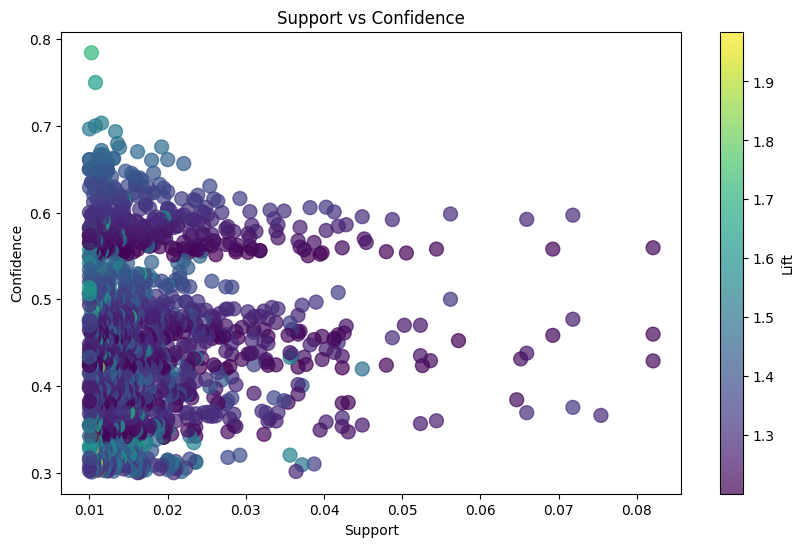

In [174]:
plt.figure(figsize=(10, 6))
plt.scatter(
    rules["support"],
    rules["confidence"],
    c=rules["lift"],
    cmap="viridis",
    s=100,
    alpha=0.7,
)
plt.colorbar(label="Lift")
plt.title("Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

#### Lift Matrix

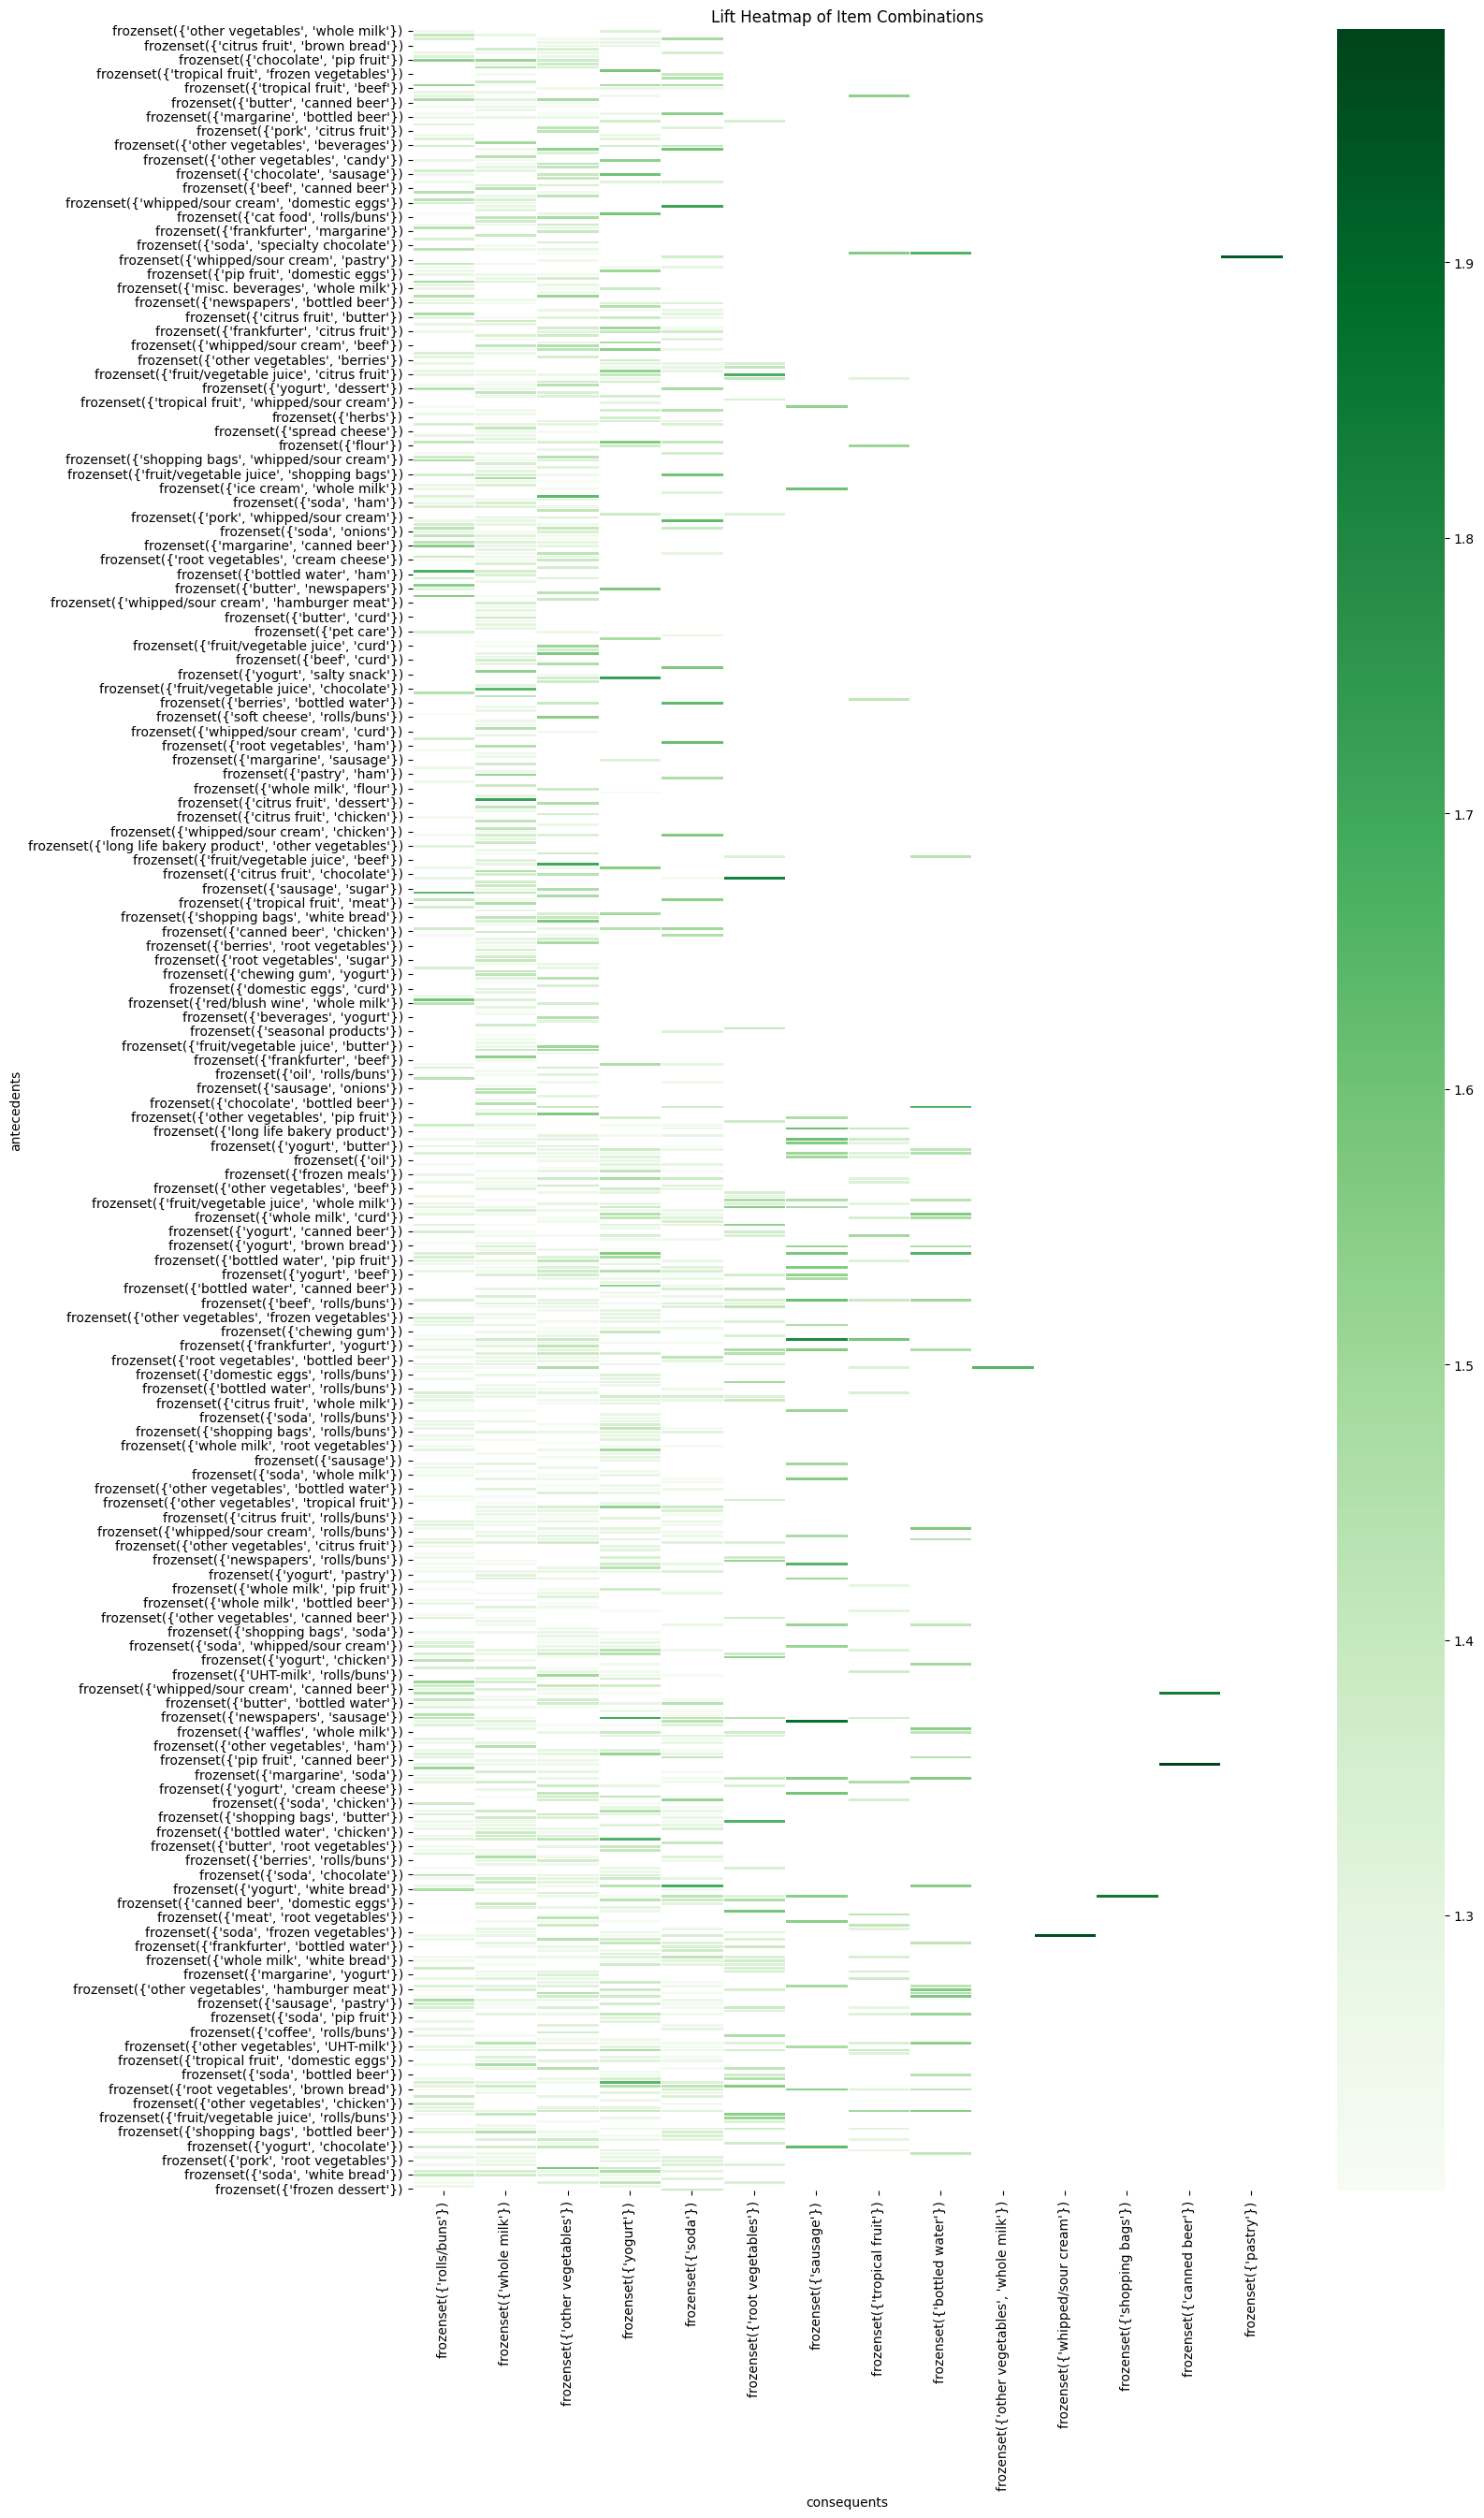

consequents                     (rolls/buns)  (whole milk)  \
antecedents                                                  
(other vegetables, whole milk)      1.226753           NaN   
(napkins, root vegetables)          1.413867      1.275187   
(beverages, whole milk)             1.351938           NaN   
(pork, bottled water)                    NaN           NaN   
(citrus fruit, brown bread)              NaN           NaN   
...                                      ...           ...   
(soda, white bread)                 1.418116      1.370846   
(citrus fruit, tropical fruit)      1.200829           NaN   
(berries, whole milk)               1.233669           NaN   
(pip fruit, root vegetables)        1.249138           NaN   
(frozen dessert)                         NaN           NaN   

consequents                     (other vegetables)  (yogurt)    (soda)  \
antecedents                                                              
(other vegetables, whole milk)                 NaN  1.326434       NaN   
(napkins, root vegetables)                     NaN       NaN       NaN   
(beverages, whole milk)                   1.231100  1.285090  1.478932   
(pork, bottled water)                     1.255239  1.285090       NaN   
(citrus fruit, brown bread)               1.266755  1.296880       NaN   
...                                            ...       ...       ...   
(soda, white bread)                       1.316684  1.255884       NaN   
(citrus fruit, tropical fruit)                 NaN  1.210541  1.321762   
(berries, whole milk)                     1.318979  1.408980       NaN   
(pip fruit, root vegetables)                   NaN  1.259241       NaN   
(frozen dessert)                               NaN       NaN  1.382270   

consequents                     (root vegetables)  (sausage)  \
antecedents                                                    
(other vegetables, whole milk)                NaN        NaN   
(napkins, root vegetables)                    NaN        NaN   
(beverages, whole milk)                       NaN        NaN   
(pork, bottled water)                         NaN        NaN   
(citrus fruit, brown bread)                   NaN        NaN   
...                                           ...        ...   
(soda, white bread)                           NaN        NaN   
(citrus fruit, tropical fruit)                NaN        NaN   
(berries, whole milk)                    1.331952        NaN   
(pip fruit, root vegetables)                  NaN        NaN   
(frozen dessert)                              NaN        NaN   

consequents                     (tropical fruit)  (bottled water)  \
antecedents                                                         
(other vegetables, whole milk)               NaN              NaN   
(napkins, root vegetables)                   NaN              NaN   
(beverages, whole milk)                      NaN              NaN   
(pork, bottled water)                        NaN              NaN   
(citrus fruit, brown bread)                  NaN              NaN   
...                                          ...              ...   
(soda, white bread)                          NaN              NaN   
(citrus fruit, tropical fruit)               NaN              NaN   
(berries, whole milk)                        NaN              NaN   
(pip fruit, root vegetables)                 NaN              NaN   
(frozen dessert)                             NaN              NaN   

consequents                     (other vegetables, whole milk)  \
antecedents                                                      
(other vegetables, whole milk)                             NaN   
(napkins, root vegetables)                                 NaN   
(beverages, whole milk)                                    NaN   
(pork, bottled water)                                      NaN   
(citrus fruit, brown bread)                                NaN   
...                                  

In [175]:
# Matrix Visualization but with the lift as the color and no labels on the cells
heatmap_data = rules.pivot(index="antecedents", columns="consequents", values="lift")

plt.figure(figsize=(15, 30))
sns.heatmap(heatmap_data, annot=False, cmap="Greens", linewidths=0.5)
plt.title("Lift Heatmap of Item Combinations")
plt.show()

heatmap_data

#### Network Graph

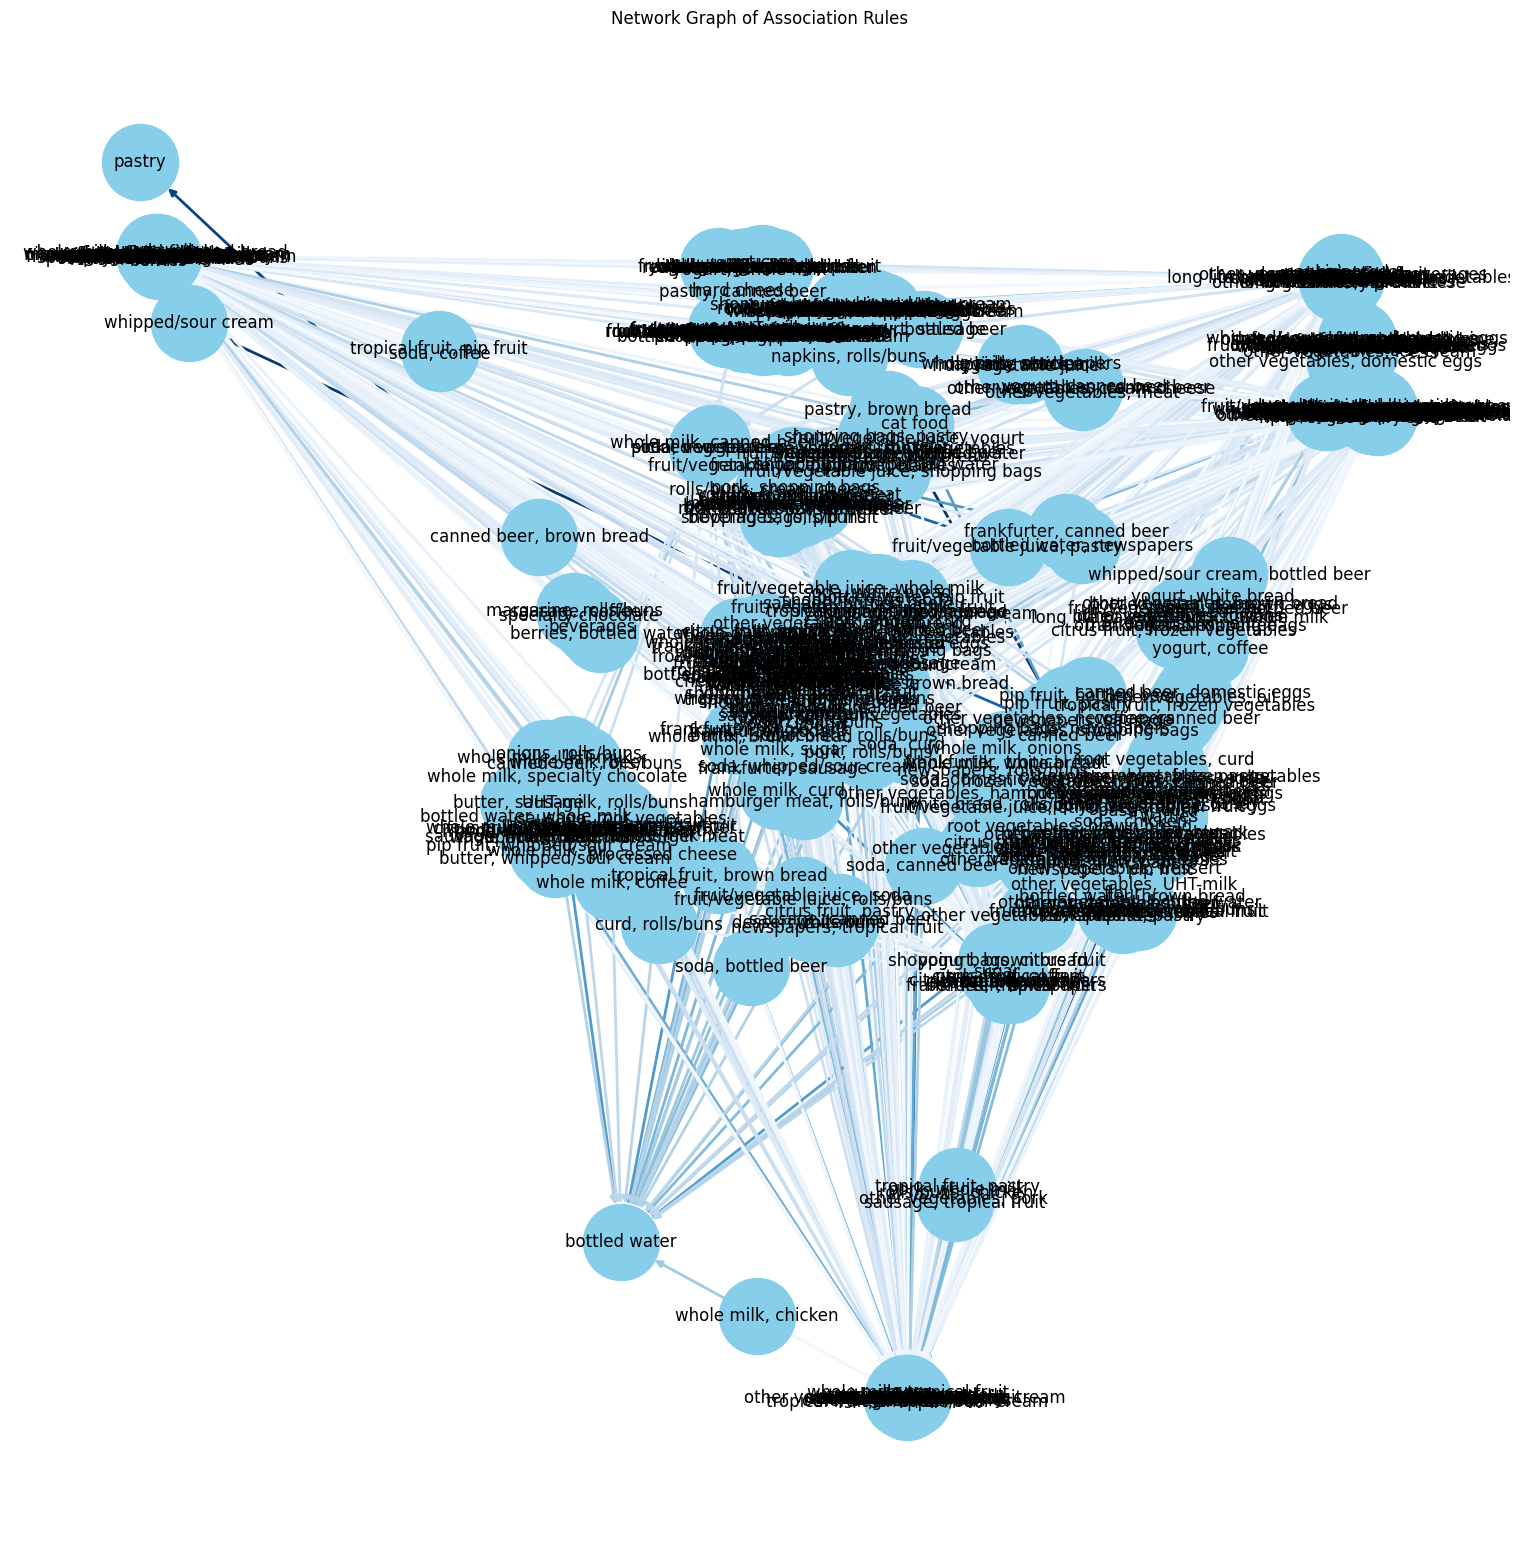

In [176]:
# Create a Network Graph
plt.figure(figsize=(15, 15))
G = nx.DiGraph()

for _, row in sorted_rules.iterrows():
    G.add_edge(
        ", ".join(row["antecedents"]), ", ".join(row["consequents"]), weight=row["lift"]
    )

pos = nx.spring_layout(G, k=0.0001, seed=42)
edges = G.edges(data=True)
weights = [edge[2]["weight"] for edge in edges]

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color="skyblue",
    edge_color=weights,
    width=2.0,
    edge_cmap=plt.cm.Blues,
)
plt.title("Network Graph of Association Rules")
plt.show()

## Questions to Answer:

### Which rules have the highest lift, and what do they indicate? 

In [177]:
print(f"antecedents: {sorted_rules.iloc[0]['antecedents']}")
print(f"consequents: {sorted_rules.iloc[0]['consequents']}")
print(f"lift: {sorted_rules.iloc[0]['lift']}")

antecedents: frozenset({'pastry', 'brown bread'})
consequents: frozenset({'canned beer'})
lift: 1.9845229610019344


In [178]:
print(f"antecedents: {sorted_rules.iloc[1]['antecedents']}")
print(f"consequents: {sorted_rules.iloc[1]['consequents']}")
print(f"lift: {sorted_rules.iloc[1]['lift']}")

antecedents: frozenset({'other vegetables', 'white bread'})
consequents: frozenset({'whipped/sour cream'})
lift: 1.9575129049587745


In [179]:
print(f"antecedents: {sorted_rules.iloc[2]['antecedents']}")
print(f"consequents: {sorted_rules.iloc[2]['consequents']}")
print(f"lift: {sorted_rules.iloc[2]['lift']}")

antecedents: frozenset({'canned beer', 'brown bread'})
consequents: frozenset({'pastry'})
lift: 1.9257941801294403


#### Rule 1:  
**Antecedents:** `(pastry, brown bread)`  
**Consequents:** (canned beer)`  
- **Lift:** 1.984523  
This rule indicates that customers who purchase both **pastry and brown bread** are nearly twice as likely (1.98 times) to also buy **canned beer** compared to a random customer. This suggests a potential cross-selling opportunity for these products.

#### Rule 2:  
**Antecedents:** `(other vegetables, white bread)`  
**Consequents:** `(whipped/sour cream)`  
- **Lift:** 1.957513  
This rule indicates that customers who buy **other vegetables and white bread** are about 1.96 times more likely to also purchase **whipped/sour cream**. This suggests a strong complementary relationship between these products, useful for joint promotions.

#### Rule 3:  
**Antecedents:** `(canned beer, brown bread)`  
**Consequents:** `(pastry)`  
- **Lift:** 1.925794  
This rule shows that customers purchasing **canned beer and brown bread** are 1.93 times more likely to buy **pastry**. It highlights a possible bundled product offering for beverages and bakery items.

### Identify at least one niche relationship (low support, high lift). Why might this rule be valuable? 

In [180]:
# Filter for niche rules: low support and high lift
niche_rules = rules[
    (rules["support"] < 0.0101)  # Low support threshold
    & (rules["lift"] > 1.6)  # High lift threshold
]

# Sort by lift to get the most impactful niche rules
niche_rules_sorted = niche_rules.sort_values(by="lift", ascending=False)

# Display the top niche rule
niche_rules_sorted.head()

antecedents      consequents  antecedent support  \
2340            (berries, soda)  (bottled water)            0.028220   
2341   (berries, bottled water)           (soda)            0.019497   
2374  (frankfurter, newspapers)           (soda)            0.019754   
2311    (ice cream, whole milk)        (sausage)            0.030272   

      consequent support   support  confidence      lift  representativity  \
2340            0.213699  0.010005    0.354545  1.659085               1.0   
2341            0.313494  0.010005    0.513158  1.636898               1.0   
2374            0.313494  0.010005    0.506494  1.615640               1.0   
2311            0.206003  0.010005    0.330508  1.604386               1.0   

      leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
2340  0.003975    1.218212       0.408794  0.043142   0.179125    0.200682  
2341  0.003893    1.410120       0.396825  0.030977   0.290841    0.272536  
2374  0.003812    1.391078       0.388729  0.030952   0.281133    0.269204  
2311  0.003769    1.185970       0.388468  0.044218   0.156808    0.189538

(berries, bottled water)  --->	(soda)	

Support = 0.010005

Lift = 1.636898

#### Explanation of the Niche Rule

This rule shows the following association:

- **Antecedents (if items bought):** `berries` and `bottled water`
- **Consequent (then also bought):** `soda`

##### Key Metrics:
- **Support:** `0.010005` → About 1% of transactions contain this combination.
- **Confidence:** `0.313494` → 31.35% of transactions with `berries` and `bottled water` also include `soda`.
- **Lift:** `1.636898` → Customers buying `berries` and `bottled water` are 1.63 times more likely to also buy `soda` compared to random chance.
- **Leverage:** `0.003893` → Indicates a small but positive co-occurrence effect.

##### Why is it Valuable?
This rule, despite its **low support**, has **high lift**, meaning it's a strong association in a small niche of customers. Businesses can use this to:
1. **Cross-promote items:** Offer discounts on soda when `berries` and `bottled water` are purchased.
2. **Strategic placement:** Place these items near each other in-store or online.
3. **Targeted marketing:** Send personalized promotions to customers buying `berries` and `bottled water`. 

This rule highlights a high-value, specific relationship that could drive increased sales in a targeted segment.

# Conclusion

- We learned about Association Rule Mining in this lab and how to visualize all the rules we get from the `association_rules` funtion by passing it the frequent_itemsets we get from the apriori algorithm. 

- We also learned how to use the the TransactionEncoder.

- We visualized the results using a `network graph`, `scatter plot` and `lift matrix`.

- In this lab we also utilized the Groceries dataset to implement Market Basket Analysis using the Apriori algorithm. It identified strong associations between items, such as `berries` and `bottled water` with `soda`, highlighting opportunities for cross-promotions. Advanced visualizations, like heatmaps and scatter plots, provided actionable insights for strategic decision-making.